In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import timeit

In [2]:
# datasets
dirty_train1 = pd.read_csv("./data/dirty_acm_train.tsv", sep="\t")
dirty_train2 = pd.read_csv("./data/dirty_scholar_train.tsv", sep="\t")
dirty_train3 = pd.read_csv("./data/dirty_amazon_train.tsv", sep="\t")
dirty_train4 = pd.read_csv("./data/dirty_walmart_train.tsv", sep="\t")
clean_train1 = pd.read_csv("./data/clean_acm_train.tsv", sep="\t")
clean_train2 = pd.read_csv("./data/clean_scholar_train.tsv", sep="\t")
clean_train3 = pd.read_csv("./data/clean_amazon_train.tsv", sep="\t")
clean_train4 = pd.read_csv("./data/clean_walmart_train.tsv", sep="\t")
dirty_test1 = pd.read_csv("./data/dirty_acm_test.tsv", sep="\t")
dirty_test2 = pd.read_csv("./data/dirty_scholar_test.tsv", sep="\t")
dirty_test3 = pd.read_csv("./data/dirty_amazon_test.tsv", sep="\t")
dirty_test4 = pd.read_csv("./data/dirty_walmart_test.tsv", sep="\t")
clean_test1 = pd.read_csv("./data/clean_acm_test.tsv", sep="\t")
clean_test2 = pd.read_csv("./data/clean_scholar_test.tsv", sep="\t")
clean_test3 = pd.read_csv("./data/clean_amazon_test.tsv", sep="\t")
clean_test4 = pd.read_csv("./data/clean_walmart_test.tsv", sep="\t")

In [3]:
# character based
def charDistance(s1,s2):
    # get the length of the strings
    m = len(s1)
    n = len(s2)
    # if some of them are empty, return the longer length of them
    if (m==0|n==0):
        return max(m,n)
    # create an empty matrix to store the calculation result
    A = np.zeros((m+1,n+1))
    # initialize the first row and column
    for i in range(0,m+1):
        A[i][0]=i
    for j in range(1,n+1):
        A[0][j]=j
    # calculate the distance column by column
    for j in range(1,n+1):
        for i in range(1,m+1):
            if (s1[i-1]==s2[j-1]):
                d=0
            else: d=1
            A[i][j]=min(A[i-1][j]+1,A[i][j-1]+1,A[i-1][j-1]+d)
    # return the final result
    return A[m][n]/max(m,n)

def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

def getDistanceChar(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = charDistance(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

def max_threshold(dist, real):
    max_f = 0
    max_t = 0
    threshold_list = np.linspace(0,1,101)
    for i in range(len(threshold_list)):
        pre_list = prediction(dist, threshold_list[i])
        pre = toInt(pre_list)
        f = f1_score(real, pre, average='binary')
        if f>max_f:
            max_f = f
            max_t = threshold_list[i]
    return max_t, max_f

def toStr(list):
    result = []
    for i in range(len(list)):
        a = str(list[i])
        result.append(a)
    return result

## dblp acm

dblp acm clean character based method
threshold of the training set is:0.49
f1 score of training set is:0.8790035587188612
f1 score of the testing set is:0.8759124087591241
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2029
           1       0.82      0.95      0.88       444

    accuracy                           0.95      2473
   macro avg       0.90      0.95      0.92      2473
weighted avg       0.96      0.95      0.95      2473

[[1934   95]
 [  24  420]]
3min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


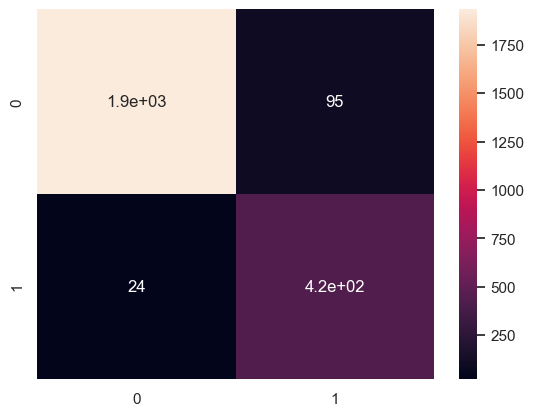

In [6]:
%%timeit -r 1 -n 1
# dblp acm clean character based
dist_train_char_1_1 = getDistanceChar(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_char_1_1, f_train_char_1_1 = max_threshold(dist_train_char_1_1, real_train1_1)
print('dblp acm clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_1_1))
print('f1 score of training set is:{}'.format(f_train_char_1_1))
dist_test_char_1_1 = getDistanceChar(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_char_1_1 = prediction(dist_test_char_1_1, t_train_char_1_1)
pre_char_1_1 = toInt(pre_list_char_1_1)
f_test_char_1_1 = f1_score(real_test1_1, pre_char_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_1_1))
print(classification_report(real_test1_1, pre_char_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_char_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

dblp acm dirty character based method
threshold of the training set is:0.51
f1 score of training set is:0.8771670970121725
f1 score of the testing set is:0.8540540540540541
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2029
           1       0.82      0.89      0.85       444

    accuracy                           0.95      2473
   macro avg       0.90      0.92      0.91      2473
weighted avg       0.95      0.95      0.95      2473

[[1943   86]
 [  49  395]]
3min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


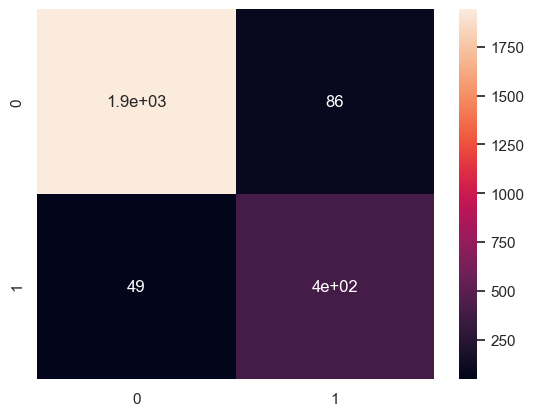

In [7]:
%%timeit -r 1 -n 1
# dblp acm dirty character based
dist_train_char_1_1 = getDistanceChar(dirty_train1['text_left'], dirty_train1['text_right'])
real_train1_1 = toInt(dirty_train1['label'])
t_train_char_1_1, f_train_char_1_1 = max_threshold(dist_train_char_1_1, real_train1_1)
print('dblp acm dirty character based method')
print('threshold of the training set is:{}'.format(t_train_char_1_1))
print('f1 score of training set is:{}'.format(f_train_char_1_1))
dist_test_char_1_1 = getDistanceChar(dirty_test1['text_left'], dirty_test1['text_right'])
real_test1_1 = toInt(dirty_test1['label'])
pre_list_char_1_1 = prediction(dist_test_char_1_1, t_train_char_1_1)
pre_char_1_1 = toInt(pre_list_char_1_1)
f_test_char_1_1 = f1_score(real_test1_1, pre_char_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_1_1))
print(classification_report(real_test1_1, pre_char_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_char_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

## dblp scholar

dblp scholar clean character based method
threshold of the training set is:0.5
f1 score of training set is:0.8397338977925612
f1 score of the testing set is:0.838095238095238
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4672
           1       0.81      0.86      0.84      1070

    accuracy                           0.94      5742
   macro avg       0.89      0.91      0.90      5742
weighted avg       0.94      0.94      0.94      5742

[[4461  211]
 [ 146  924]]
4min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


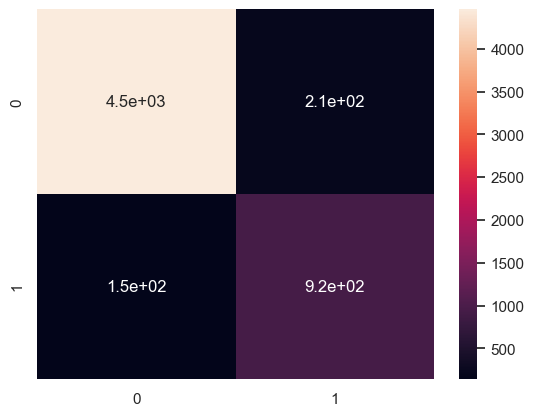

In [16]:
%%timeit -r 1 -n 1
# dblp scholar clean character based
dist_train_char_2_1 = getDistanceChar(clean_train2['text_left'], clean_train2['text_right'])
real_train2_1 = toInt(clean_train2['label'])
t_train_char_2_1, f_train_char_2_1 = max_threshold(dist_train_char_2_1, real_train2_1)
print('dblp scholar clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_2_1))
print('f1 score of training set is:{}'.format(f_train_char_2_1))
dist_test_char_2_1 = getDistanceChar(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_char_2_1 = prediction(dist_test_char_2_1, t_train_char_2_1)
pre_char_2_1 = toInt(pre_list_char_2_1)
f_test_char_2_1 = f1_score(real_test2_1, pre_char_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_2_1))
print(classification_report(real_test2_1, pre_char_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_char_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

dblp scholar dirty character based method
threshold of the training set is:0.51
f1 score of training set is:0.8145285935085007
f1 score of the testing set is:0.8078541374474054
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4672
           1       0.81      0.81      0.81      1070

    accuracy                           0.93      5742
   macro avg       0.88      0.88      0.88      5742
weighted avg       0.93      0.93      0.93      5742

[[4467  205]
 [ 206  864]]
4min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


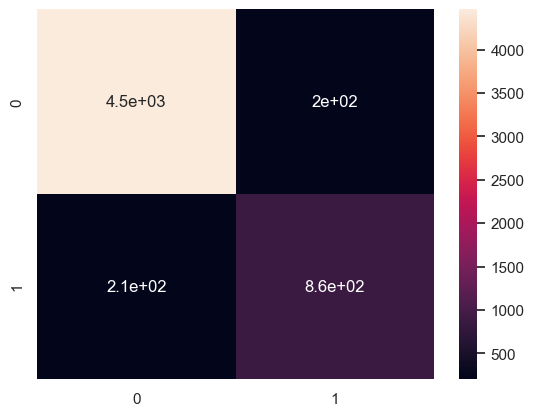

In [17]:
%%timeit -r 1 -n 1
# dblp scholar dirty character based
dist_train_char_2_1 = getDistanceChar(dirty_train2['text_left'], dirty_train2['text_right'])
real_train2_1 = toInt(dirty_train2['label'])
t_train_char_2_1, f_train_char_2_1 = max_threshold(dist_train_char_2_1, real_train2_1)
print('dblp scholar dirty character based method')
print('threshold of the training set is:{}'.format(t_train_char_2_1))
print('f1 score of training set is:{}'.format(f_train_char_2_1))
dist_test_char_2_1 = getDistanceChar(dirty_test2['text_left'], dirty_test2['text_right'])
real_test2_1 = toInt(dirty_test2['label'])
pre_list_char_2_1 = prediction(dist_test_char_2_1, t_train_char_2_1)
pre_char_2_1 = toInt(pre_list_char_2_1)
f_test_char_2_1 = f1_score(real_test2_1, pre_char_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_2_1))
print(classification_report(real_test2_1, pre_char_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_char_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

## amazon itunes

amazon itunes clean character based method
threshold of the training set is:0.59
f1 score of training set is:0.4916666666666667
f1 score of the testing set is:0.4675324675324675
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        82
           1       0.36      0.67      0.47        27

    accuracy                           0.62       109
   macro avg       0.60      0.64      0.59       109
weighted avg       0.73      0.62      0.65       109

[[50 32]
 [ 9 18]]
20.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


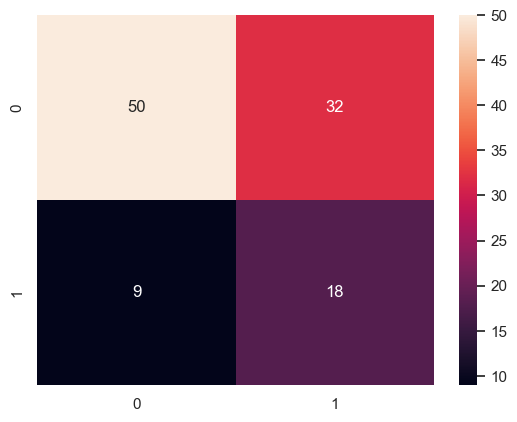

In [26]:
%%timeit -r 1 -n 1
# amazon itunes clean character based
dist_train_char_3_1 = getDistanceChar(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_char_3_1, f_train_char_3_1 = max_threshold(dist_train_char_3_1, real_train3_1)
print('amazon itunes clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_3_1))
print('f1 score of training set is:{}'.format(f_train_char_3_1))
dist_test_char_3_1 = getDistanceChar(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_char_3_1 = prediction(dist_test_char_3_1, t_train_char_3_1)
pre_char_3_1 = toInt(pre_list_char_3_1)
f_test_char_3_1 = f1_score(real_test3_1, pre_char_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_3_1))
print(classification_report(real_test3_1, pre_char_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_char_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

amazon itunes dirty character based method
threshold of the training set is:0.71
f1 score of training set is:0.4803149606299213
f1 score of the testing set is:0.41304347826086957
              precision    recall  f1-score   support

           0       0.82      0.44      0.57        82
           1       0.29      0.70      0.41        27

    accuracy                           0.50       109
   macro avg       0.56      0.57      0.49       109
weighted avg       0.69      0.50      0.53       109

[[36 46]
 [ 8 19]]
20 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


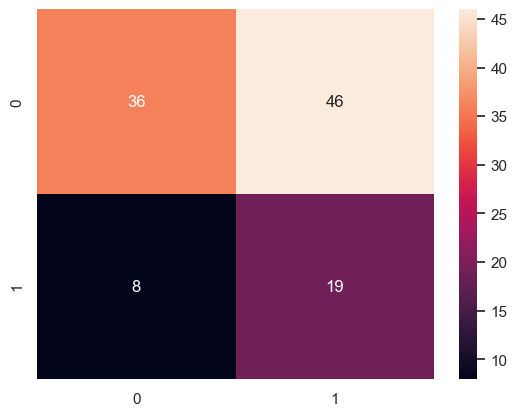

In [27]:
%%timeit -r 1 -n 1
# amazon itunes dirty character based
dist_train_char_3_1 = getDistanceChar(dirty_train3['text_left'], dirty_train3['text_right'])
real_train3_1 = toInt(dirty_train3['label'])
t_train_char_3_1, f_train_char_3_1 = max_threshold(dist_train_char_3_1, real_train3_1)
print('amazon itunes dirty character based method')
print('threshold of the training set is:{}'.format(t_train_char_3_1))
print('f1 score of training set is:{}'.format(f_train_char_3_1))
dist_test_char_3_1 = getDistanceChar(dirty_test3['text_left'], dirty_test3['text_right'])
real_test3_1 = toInt(dirty_test3['label'])
pre_list_char_3_1 = prediction(dist_test_char_3_1, t_train_char_3_1)
pre_char_3_1 = toInt(pre_list_char_3_1)
f_test_char_3_1 = f1_score(real_test3_1, pre_char_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_3_1))
print(classification_report(real_test3_1, pre_char_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_char_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

## walmart amazon

walmart amazon clean character based method
threshold of the training set is:0.36
f1 score of training set is:0.2543554006968641
f1 score of the testing set is:0.2789473684210526
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1856
           1       0.28      0.27      0.28       193

    accuracy                           0.87      2049
   macro avg       0.60      0.60      0.60      2049
weighted avg       0.86      0.87      0.87      2049

[[1722  134]
 [ 140   53]]
1min 36s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


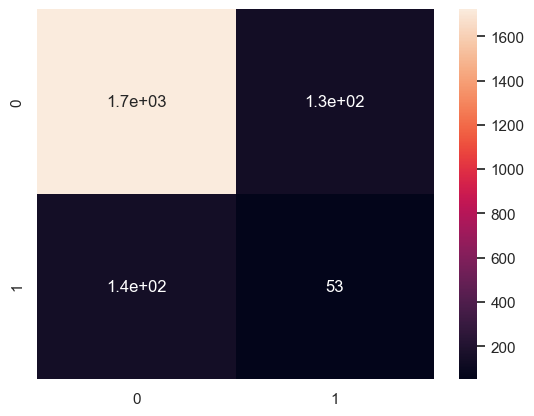

In [36]:
%%timeit -r 1 -n 1
# walmart amazon clean character based
dist_train_char_4_1 = getDistanceChar(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_char_4_1, f_train_char_4_1 = max_threshold(dist_train_char_4_1, real_train4_1)
print('walmart amazon clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_4_1))
print('f1 score of training set is:{}'.format(f_train_char_4_1))
dist_test_char_4_1 = getDistanceChar(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_char_4_1 = prediction(dist_test_char_4_1, t_train_char_4_1)
pre_char_4_1 = toInt(pre_list_char_4_1)
f_test_char_4_1 = f1_score(real_test4_1, pre_char_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_4_1))
print(classification_report(real_test4_1, pre_char_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_char_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

walmart amazon dirty character based method
threshold of the training set is:0.43
f1 score of training set is:0.23831070889894418
f1 score of the testing set is:0.24586288416075652
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1856
           1       0.23      0.27      0.25       193

    accuracy                           0.84      2049
   macro avg       0.57      0.59      0.58      2049
weighted avg       0.86      0.84      0.85      2049

[[1678  178]
 [ 141   52]]
1min 36s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


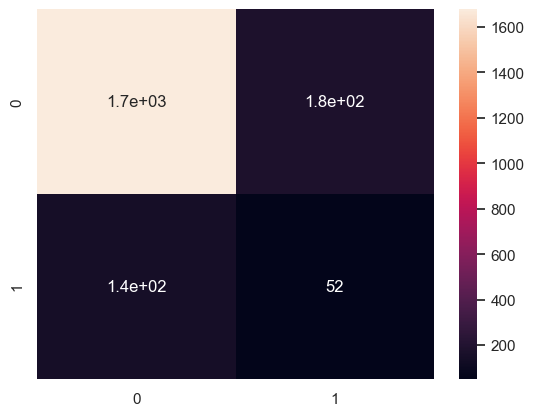

In [37]:
%%timeit -r 1 -n 1
# walmart amazon dirty character based
dist_train_char_4_1 = getDistanceChar(dirty_train4['text_left'], dirty_train4['text_right'])
real_train4_1 = toInt(dirty_train4['label'])
t_train_char_4_1, f_train_char_4_1 = max_threshold(dist_train_char_4_1, real_train4_1)
print('walmart amazon dirty character based method')
print('threshold of the training set is:{}'.format(t_train_char_4_1))
print('f1 score of training set is:{}'.format(f_train_char_4_1))
dist_test_char_4_1 = getDistanceChar(dirty_test4['text_left'], dirty_test4['text_right'])
real_test4_1 = toInt(dirty_test4['label'])
pre_list_char_4_1 = prediction(dist_test_char_4_1, t_train_char_4_1)
pre_char_4_1 = toInt(pre_list_char_4_1)
f_test_char_4_1 = f1_score(real_test4_1, pre_char_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_4_1))
print(classification_report(real_test4_1, pre_char_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_char_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)